# Alan Romero Vera - Jr Data Scientist - Skill Test
Provided with the Telco Customer Churn data from the Kaggle IBM Sample Datasets, create a Python model to predict customer churn as well as proposing 5 client retention programs to increase engagement.

Setting seed for replication purposes

In [1]:
seed = 123456

## -Importing Libraries

In [2]:
#Installing libraries
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install matplotlib
#pip install sklearn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sbrn
import matplotlib.pyplot as plt

## -Exploratory Analysis

File location

In [4]:
fl = "/Users/alanromerovera/Desktop/BusinessCase/jr_ds_test-master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

Import Dataset

In [5]:
df = pd.read_csv("/Users/alanromerovera/Desktop/BusinessCase/jr_ds_test-master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.shape

(7043, 21)

### -Dictionary

customerID: Customer ID

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

Tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit 
card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### -Find any missing values

In [9]:
df.isna().sum().sum()

0

No missing values in the dataset.

### -Transform "Churn" variable into numeric
Yes = 1

No = 0

In [10]:
binary = {'Yes':1, 'No':0}
df.Churn.replace(binary, inplace=True)

In [11]:
df.Churn.mean()

0.2653698707936959

### -Exploring categorical variables
This section focuses only in categorical variables. It takes a look at the count of values in each variable and how they relate to the churn rates. If the difference between categories in terms of churn is < 0.01, the variable will not be taken into consideration for the model as it has little to none effect on the target variable (Churn). Also, if a variable is has a direct relation to another one, one will not be considered for the model to avoid overfitting.

Text(0.5, 1.0, 'Gender Distribution')

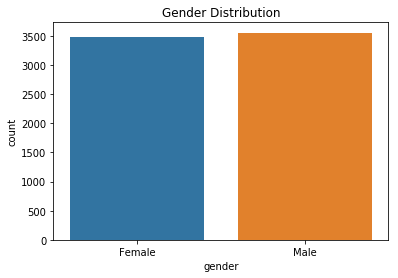

In [12]:
sbrn.countplot("gender", data=df).set_title("Gender Distribution")

In [13]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


Difference is very small and similar to the overall churn rate: Variable "gender" will not be taken into consideration for the model.

Text(0.5, 1.0, 'Senior Citizen Distribution')

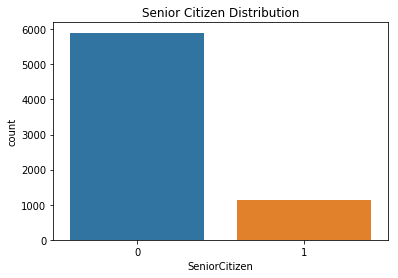

In [14]:
sbrn.countplot("SeniorCitizen", data=df).set_title("Senior Citizen Distribution")

In [15]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


Most of the population is not a senior citizen. Also, senior citizens have higher churn rates: Variable "SeniorCitizen" will be taken into consideration for the model.

Text(0.5, 1.0, 'Partner Distribution')

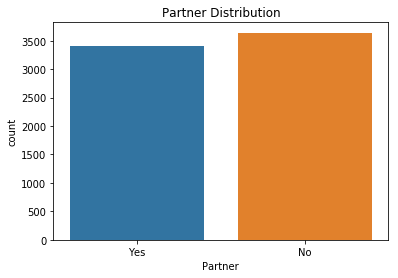

In [16]:
sbrn.countplot("Partner", data=df).set_title("Partner Distribution")

In [17]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


Difference is greater than 0.01: Variable "Partner" will be taken into consideration for the model.

Text(0.5, 1.0, 'Dependents Distribution')

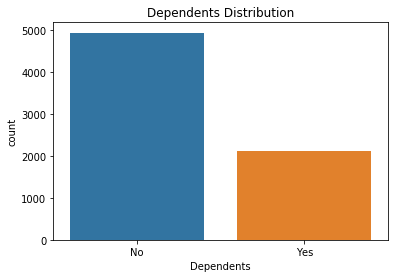

In [18]:
sbrn.countplot("Dependents", data=df).set_title("Dependents Distribution")

In [19]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


Here we see a greater difference: Variable "Dependents" will be taken into consideration for the model.

Text(0.5, 1.0, 'Phone Service Distribution')

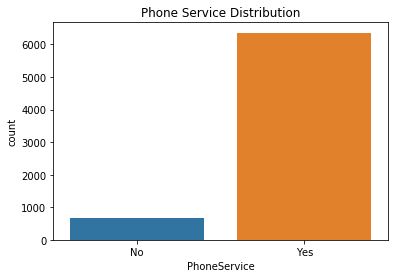

In [20]:
sbrn.countplot("PhoneService", data=df).set_title("Phone Service Distribution")

In [21]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


Most of the customers have phone service, and the difference is greater than 0.01. Before deciding wether to include this variable in our model, we will first take a look at the variable "MultipleLines" as it is directly related to "PhoneService".

Text(0.5, 1.0, 'Multiple Lines Distribution')

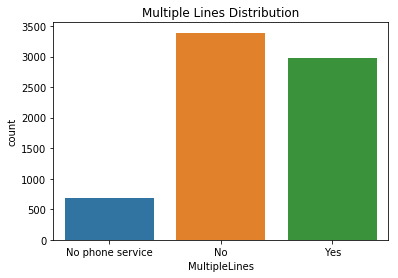

In [23]:
sbrn.countplot("MultipleLines", data=df).set_title("Multiple Lines Distribution")

In [24]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [25]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [26]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

A customer cannot have multiple lines if he/she does not have phone service. This can as well be observed with the value counts on both variables, so the variable "PhoneService" will not be taken into consideration for the model. Instead, the variable "MultipleLines" will be.

Text(0.5, 1.0, 'Internet Service Distribution')

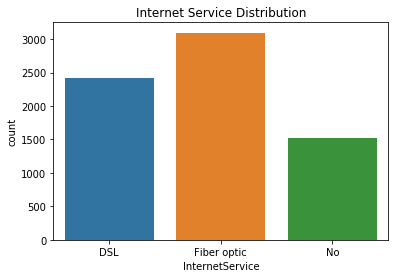

In [28]:
sbrn.countplot("InternetService", data=df).set_title("Internet Service Distribution")

In [29]:
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


Internet service has similar observations between DSL and Fiber optic InternetService, but highly different churn rates: Variable "InternetService" will be taken into consideration for the model

Text(0.5, 1.0, 'Streaming TV Distribution')

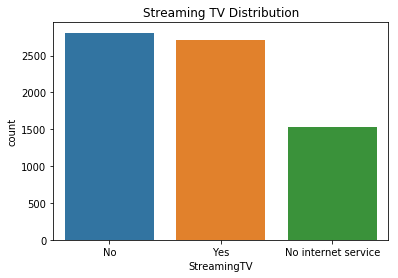

In [30]:
sbrn.countplot("StreamingTV", data=df).set_title("Streaming TV Distribution")

In [31]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


Difference is greater than 0.01: Variable "StreamingTV" will be taken into consideration for the model.

Text(0.5, 1.0, 'Streaming Movies Distribution')

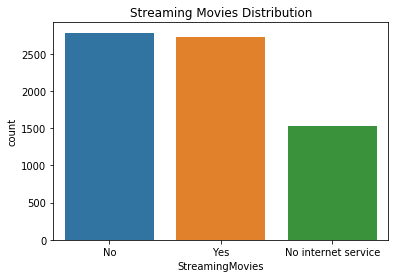

In [32]:
sbrn.countplot("StreamingMovies", data=df).set_title("Streaming Movies Distribution")

In [33]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


Difference is greater than 0.01: Variable "StreamingMovies" will be taken into consideration for the model.

Text(0.5, 1.0, 'Online Security Distribution')

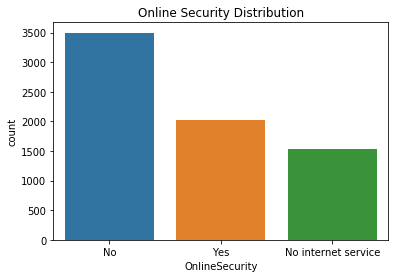

In [34]:
sbrn.countplot("OnlineSecurity", data=df).set_title("Online Security Distribution")

In [35]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


Difference is greater than 0.01: Variable "OnlineSecurity" will be taken into consideration for the model

Text(0.5, 1.0, 'Online Backup Distribution')

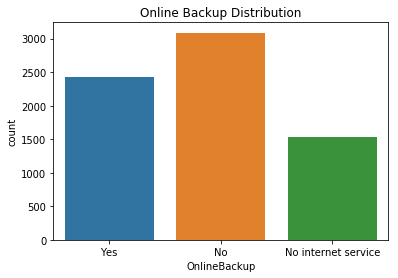

In [36]:
sbrn.countplot("OnlineBackup", data=df).set_title("Online Backup Distribution")

In [37]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


Difference is greater than 0.01: Variable "OnlineBackup" will be taken into consideration for the model

Text(0.5, 1.0, 'Device Protection Distribution')

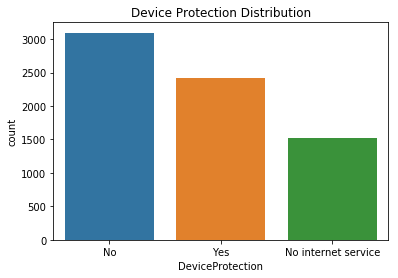

In [38]:
sbrn.countplot("DeviceProtection", data=df).set_title("Device Protection Distribution")

In [39]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


Difference is greater than 0.01: Variable "DeviceProtection" will be taken into consideration for the model

Text(0.5, 1.0, 'Tech Support Distribution')

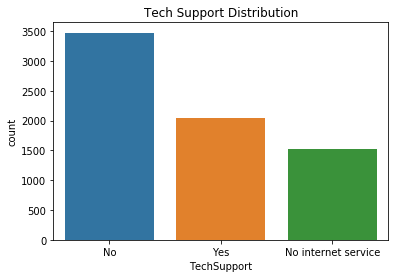

In [40]:
sbrn.countplot("TechSupport", data=df).set_title("Tech Support Distribution")

In [41]:
df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


Difference is greater than 0.01: Variable "TechSupport" will be taken into consideration for the model

Text(0.5, 1.0, 'Contract Distirbution')

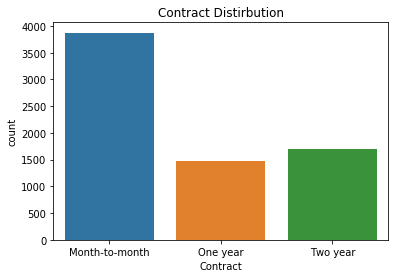

In [42]:
sbrn.countplot("Contract", data=df).set_title("Contract Distirbution")

In [43]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


As expected, the longer term the contract, the less churn rates. However, the tenure variable also provides information related to contract times, so the decision wether to include the Contract variable will be taken after exploring the tenure variable.

Text(0.5, 1.0, 'Paperless Billing Distribution')

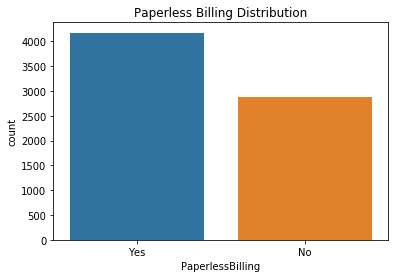

In [44]:
sbrn.countplot("PaperlessBilling", data=df).set_title("Paperless Billing Distribution")

In [45]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


Difference is greater than 0.01: Variable "PaperlessBilling" will be taken into consideration for the model

Text(0.5, 1.0, 'Payment Method Distribution')

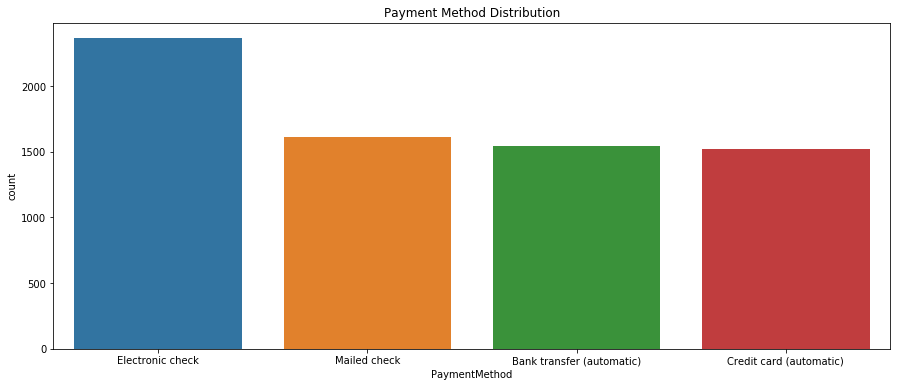

In [46]:
plt.figure(figsize=(15,6))
sbrn.countplot("PaymentMethod", data=df).set_title("Payment Method Distribution")

In [47]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Electronic check has de highest churn values: Variable "PaymentMethod" will be taken into consideration for the model.

### -Exploring continuous variables
This section focuses only in continuous variables. It takes a look at their distributions and relationship with the churn variable. If one variable is a combination of another, one will not be considered for the model to avoid overfitting.

Text(0.5, 1.0, 'Tenure Distribution')

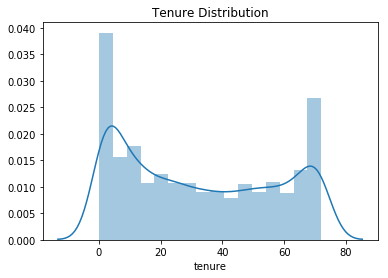

In [48]:
sbrn.distplot(df['tenure']).set_title("Tenure Distribution")

In [49]:
df['tenure'].max()

72

In [50]:
df['tenure'].min()

0

"Tenure" feature has no outliers

In [51]:
df[['tenure','Churn']].groupby('Churn').mean()

,tenure
Churn,
0,37.569965
1,17.979133


The tenure variable shows that the longer a client stays with the company, he/she is less likely to churn. This was also shown in the "Contract" variable. However, as the "tenure" variable is continuous, it provides wider information: the "tenure" variable will be taken into consideration for the model; the "Contract" variable will not.

Text(0.5, 1.0, 'Monthly Charges Distribution')

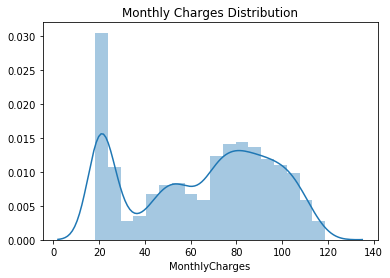

In [52]:
sbrn.distplot(df["MonthlyCharges"]).set_title("Monthly Charges Distribution")

In [53]:
df['MonthlyCharges'].max()

118.75

In [54]:
df['MonthlyCharges'].min()

18.25

Feature "MonthlyCharges" has no outliers

In [55]:
df[['MonthlyCharges','Churn']].groupby('Churn').mean()

,MonthlyCharges
Churn,
0,61.265124
1,74.441332


The variable "MonthlyCharges" shows that the customers with higher charges are more likely to churn: the variable "MonthlyCharges" will be taken into consideration for the model.

In [56]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [57]:
df['aux'] = (df['TotalCharges']/df['tenure'])/df['MonthlyCharges']

In [58]:
df.aux.mean()

1.0002748216476995

The variable "TotalCharges" equals the tenure multiplied by the monthly charges, so it won't be taken into consideration for the model.

#### The model will work with the following variables to predict churn (shown in order of appearance):

-SeniorCitizen

-Partner

-Dependents

-tenure

-MultipleLines

-InternetService

-OnlineSecurity

-OnlineBackup

-DeviceProtection

-TechSupport

-StreamingTV

-StreamingMovies

-PaperlessBilling

-PaymentMethod

-MonthlyCharges

#### The model will NOT work with the following variables due to them having little to no effect on the churn rates (shown in order of appearance):

-CustomerID

-gender

-PhoneService

-Contract

-TotalCharges

Now, having identified the variables with highest effects in churn rates, it is time to transform the data so that it can work as an input for the model.

## -Data Transformation

Having knowledge of the variables needed for the model, it is time to shape the data to our convenience. 

This section gets rid of the variables that are not necessary, as well as transforming the ones we need for the model to work.

### -Getting rid of non necessary variables

In [59]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges', 'aux'], axis=1, inplace=True)

In [60]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


Import libraries

In [61]:
from sklearn import preprocessing

In [62]:
scaler = preprocessing.MinMaxScaler()

### -Creating dummy variables for categorical features

In [63]:
categorical = ['SeniorCitizen', 'Partner', 'Dependents','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

Defining the dataset that we will be working with

In [64]:
X = pd.get_dummies(df, columns=categorical, drop_first=True)

In [65]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### -Scaling continuous variables

In [66]:
tenure_scaled = scaler.fit_transform(df[['tenure']])

/Users/alanromerovera/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [67]:
charges_scaled = scaler.fit_transform(df[['MonthlyCharges']])

In [68]:
X['tenure'] = tenure_scaled

In [69]:
X['MonthlyCharges'] = charges_scaled

We have now defined the dataset that our model will be working with. Let's take a look at it.

In [70]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [71]:
X.shape

(7043, 26)

In [72]:
X.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

As this is a small dataset, the ammount of customers who churn is small in terms of providing good information for training our model. The next step is called "upsampling", which consists in drawing a random sample from the population of customers who churned in our dataset which matches the ammount of customers who did not churn. This way our model can be trained efficiently.

### -Upsampling

For visualization purposes, in this section are shown graphs before and after upsampling.

Text(0.5, 1.0, 'Before Resampling')

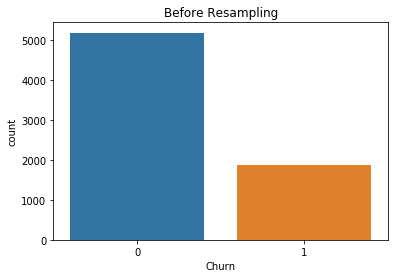

In [73]:
sbrn.countplot('Churn', data=X).set_title('Before Resampling')

In [74]:
nochurn = X[X.Churn == 0]
churn = X[X.Churn == 1]

In [75]:
print(len(nochurn))

5174


In [76]:
churn_up = churn.sample(n=len(nochurn), replace=True, random_state=seed)

In [77]:
X_up = nochurn.append(churn_up).reset_index(drop=True)

Text(0.5, 1.0, 'After Resampling')

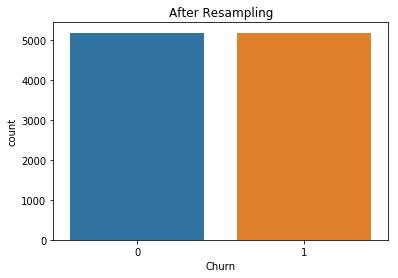

In [78]:
sbrn.countplot('Churn', data=X_up).set_title('After Resampling')

Now, the churn values are more evenly distributed.

## -Machine Learning Model: Random Forest Classifier

The point of this section is training and testing a model to predict churn. We need to identify if the customers are going to churn, so we will have to use a classification model. Also, the dataset we are working with is small. Bearing this in mind, we will use a random forest classifier model as it is the one that best suits our needs.

At first, we will train our model with default hyper-parameters and have a look at how it behaves. Then, we will try to enhance it by looking for the optimal hyper-parameters.

First we need to divide our dataset in train and test.

In [79]:
from sklearn.model_selection import train_test_split as tts

In [81]:
X = X_up.drop(['Churn'], axis=1) #features
y = X_up['Churn'] #target

In [82]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state=seed)

Now we move forward to the model

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV #for cross validation

In [103]:
rf = RandomForestClassifier()

In [104]:
rf.fit(X_train, y_train)

/Users/alanromerovera/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
y_pred_train = rf.predict(X_train)

In [106]:
accuracy_score(y_train, y_pred_train)

0.9932998324958124

In [107]:
confusion_matrix(y_train, y_pred_train)

array([[3838,   29],
       [  23, 3871]])

In [108]:
y_pred_test = rf.predict(X_test)

In [109]:
accuracy_score(y_test, y_pred_test)

0.8863548511789718

In [110]:
confusion_matrix(y_test, y_pred_test)

array([[1102,  205],
       [  89, 1191]])

At first glance, this may seem like a good model. However, the accuracy on the training sets is almost 100% and is more than 10% higher than the accuracy on the testing sets. This means our model is overfitter. In other words: our model memorized the training set and is not making predictions.

Let's take a look at the hyper-parameters and see how our model can be improved.

In [111]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Let's now have a look at how the model assigns importance to the features.

In [113]:
pd.DataFrame(rf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
tenure,0.285142
MonthlyCharges,0.242025
InternetService_Fiber optic,0.055466
OnlineSecurity_Yes,0.040007
PaymentMethod_Electronic check,0.032844
PaperlessBilling_Yes,0.028551
OnlineBackup_Yes,0.028545
Partner_Yes,0.027831
TechSupport_Yes,0.027634
SeniorCitizen_1,0.022991


As we previously discovered, the tenure and monthly charges are the features that have the highest influence in churn rates.

We will try to find even better hyper-parameters with a cross validation method using 5 K-folds.

Increasing the number of estimators can help reduce overfitting, however, it may also reduce the model's precission.

Increasing the depth can help make the model more precise, however, it can increase overfitting. 

Let's define a series of possible estimators and depth and test which of their different combinations yields the best hyper-parameters for our model.

In [116]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[8, 9, 10, 11]}

In [117]:
rf = RandomForestClassifier()

In [118]:
gscv = GridSearchCV(estimator=rf, param_grid=parameters, n_jobs=-1, cv=5, verbose = 3)

As this method uses all observations as training and testing, we can use the undivided datasets to test our possible hyper-parameter combinations.

In [119]:
gscv.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [150, 200, 250, 300], 'max_depth': [8, 9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

We can now explore the best parameters and define our new model with these

In [120]:
gscv.best_params_

{'max_depth': 11, 'n_estimators': 200}

In [121]:
depth = gscv.best_params_['max_depth']

In [122]:
estimators = gscv.best_params_['n_estimators']

In [154]:
rf = RandomForestClassifier(n_estimators=estimators, max_depth=depth)

In [155]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
y_pred_train = rf.predict(X_train)

In [157]:
accuracy_score(y_train, y_pred_train)

0.9175363999484603

In [158]:
confusion_matrix(y_test, y_pred_test)

array([[1028,  279],
       [ 109, 1171]])

In [159]:
y_pred_test = rf.predict(X_test)

In [160]:
accuracy_score(y_test, y_pred_test)

0.8531117124081948

In [161]:
confusion_matrix(y_test, y_pred_test)

array([[1027,  280],
       [ 100, 1180]])

We achieved a better model: Reduced overfitting means our model is more trustworthy.

We now have a model capable of making accurate predictions on customer churn.